In [19]:
import os
import random

import numpy as np
from PIL import Image
import cv2

from keyrover import YOLO_DATASET

[ 238  270  272  272  272  272  272  272  272  272  288  300  306  306
  320  324  324  324  324  324  324  360  360  360  360  360  360  360
  360  396  400  400  400  400  400  400  400  400  400  400  400  400
  400  400  400  400  400  400  400  400  400  400  400  400  400  400
  400  400  400  400  400  400  440  440  440  440  440  440  440  440
  440  440  440  440  440  484  540  540  540  578  600  666  880 1144
 1188 1472 4023]


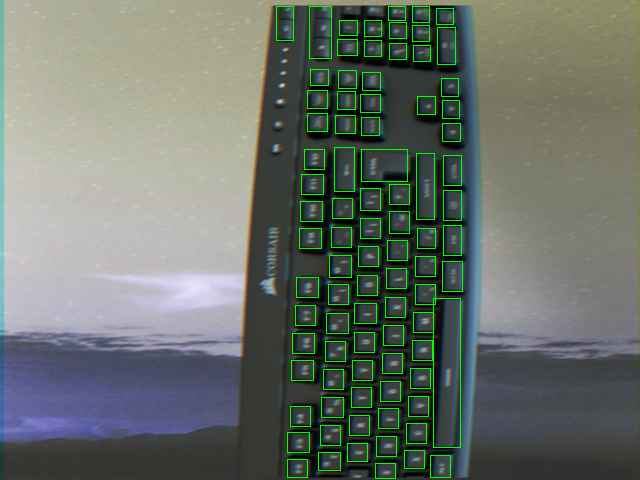

In [295]:
paths = os.listdir(f"{YOLO_DATASET}/train/labels")
i = random.choice(paths)

img = Image.open(f"{YOLO_DATASET}/train/images/{i.removesuffix('.txt')}.png")
img = np.array(img)

with open(f"{YOLO_DATASET}/train/labels/{i}") as file:
    lines = file.readlines()

areas = []

for line in lines:
    _, cx, cy, w, h = map(float, line.split())
    cx *= img.shape[1]
    cy *= img.shape[0]
    w = int(w * img.shape[1])
    h = int(h * img.shape[0])

    x1 = int(cx - w / 2)
    y1 = int(cy - h / 2)

    areas.append(w * h)
    cv2.rectangle(img, (x1, y1), (x1 + w, y1 + h), (0, 255, 0), 1)

areas = np.array(list(sorted(areas)))
print(areas)

def reject_outliers(data, m=-0.5):
    d = data - np.median(data)
    mdev = np.median(data)
    s = d / mdev if mdev else np.zeros(len(d))
    return data[s > m]


# print(reject_outliers(areas))
Image.fromarray(img)

In [1]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")
results = model.train(data="./datasets/yolo/data.yaml", time=1, patience=5, batch=32, single_cls=True, imgsz=320,
                      cache=True, verbose=True, device="mps")

Ultralytics 8.3.25 🚀 Python-3.11.1 torch-2.5.0 MPS (Apple M1 Max)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=./datasets/yolo/data.yaml, epochs=100, time=1, patience=5, batch=32, imgsz=320, save=True, save_period=-1, cache=True, device=mps, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None,

train: Scanning /Users/bhavyemathur/Desktop/Academics/College/UMich/MRover/keyboard-detection/datasets/yolo/train/labels.cache... 1793 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1793/1793 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.4GB RAM): 100%|██████████| 1793/1793 [00:01<00:00, 1113.94it/s]
val: Scanning /Users/bhavyemathur/Desktop/Academics/College/UMich/MRover/keyboard-detection/datasets/yolo/valid/labels.cache... 209 images, 0 backgrounds, 0 corrupt: 100%|██████████| 209/209 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 209/209 [00:00<00:00, 1097.93it/s]


Plotting labels to /Users/bhavyemathur/Desktop/Academics/College/UMich/MRover/keyboard-detection/runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to /Users/bhavyemathur/Desktop/Academics/College/UMich/MRover/keyboard-detection/runs/detect/train2
Starting training for 1 hours...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.27G      2.587      3.536      1.542       2658        320:  18%|█▊        | 10/57 [00:22<01:25,  1.82s/it]/Users/bhavyemathur/Desktop/Academics/College/UMich/MRover/keyboard-detection/.venv/lib/python3.11/site-packages/ultralytics/utils/tal.py:113: UserWarning: MPS: nonzero op is not natively supported for the provided input on MacOS14Falling back on CPU. This may have performance implications.See github.com/pytorch/pytorch/issues/122916 for further info (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/Indexing.mm:309.)
  bbox_scores[mask_gt] = pd_scores[ind[0], :, ind[1]][mask_gt]  # b, max_num_obj, h*w
      1/100        11G      1.766     0.9153      1.084         31        320: 100%|██████████| 57/57 [02:25<00:00,  2.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 1/4 [00:39<01:57, 39.17s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [01:04<01:02, 31.09s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 3/4 [01:34<00:30, 30.58s/it]

WARNING ⚠️ NMS time limit 2.850s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [01:59<00:00, 29.95s/it]


                   all        209      11478      0.156      0.134      0.169     0.0964

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/14      7.96G      1.375     0.3124     0.9152        202        320: 100%|██████████| 57/57 [05:17<00:00,  5.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 1/4 [00:13<00:40, 13.61s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:27<00:27, 13.96s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 3/4 [00:40<00:13, 13.49s/it]

WARNING ⚠️ NMS time limit 2.850s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:51<00:00, 12.87s/it]


                   all        209      11478       0.87     0.0622      0.131     0.0849
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/12      3.65G      1.318    0.06124      0.918         33        320: 100%|██████████| 57/57 [06:35<00:00,  6.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌       | 1/4 [00:13<00:39, 13.11s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:23<00:23, 11.66s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  75%|███████▌  | 3/4 [00:34<00:11, 11.23s/it]

WARNING ⚠️ NMS time limit 2.850s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:43<00:00, 10.93s/it]


                   all        209      11478      0.834      0.047      0.112     0.0802

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.83G      1.298     0.6494     0.9084       1670        320:  84%|████████▍ | 48/57 [06:17<01:10,  7.86s/it]


KeyboardInterrupt: 


image 1/1 /Users/bhavyemathur/Desktop/Academics/College/UMich/MRover/keyboard-detection/datasets/test/6.jpg: 480x640 68 keys, 82.1ms
Speed: 1.2ms preprocess, 82.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'key'}
obb: None
orig_img: array([[[ 21,  87, 105],
        [ 21,  87, 106],
        [ 19,  86, 107],
        ...,
        [ 50, 124, 152],
        [ 48, 124, 153],
        [ 51, 127, 156]],

       [[ 19,  85, 104],
        [ 22,  90, 109],
        [ 23,  90, 113],
        ...,
        [ 53, 127, 155],
        [ 49, 125, 154],
        [ 49, 125, 154]],

       [[ 19,  86, 107],
        [ 22,  89, 110],
        [ 21,  88, 111],
        ...,
        [ 54, 129, 155],
        [ 52, 126, 154],
        [ 48, 122, 150]],

       ...,

       [[ 31, 101, 131],
        [ 29,  99, 129],
        [ 28,  98, 128],
        ...,


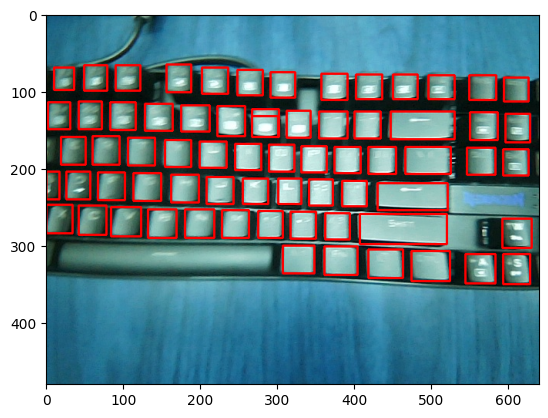

In [29]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt

results = model(f"datasets/test/6.jpg")[0]
img = results.orig_img.copy()

THRESHOLD = 0.0

print(results)

for box in results.boxes:
    if box.conf < THRESHOLD:
        continue
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    color = (255, 0, 0)
    cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness=2)

plt.imshow(img)
plt.show()